In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('311_Service_Requests_from_2010.csv')

In [4]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

# 1. Understand the dataset:

    1. Identify the shape of the dataset

    2. Identify variables with null values

In [6]:
# Identify the shape of the dataset
data.shape

(364558, 53)

In [7]:
data.shape[0]

364558

In [8]:
# Identify variables with null values
data.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [9]:
data.isna().sum()/data.shape[0]

Unique Key                        0.000000
Created Date                      0.000000
Closed Date                       0.006531
Agency                            0.000000
Agency Name                       0.000000
Complaint Type                    0.000000
Descriptor                        0.017833
Location Type                     0.000365
Incident Zip                      0.008224
Incident Address                  0.141813
Street Name                       0.141813
Cross Street 1                    0.156869
Cross Street 2                    0.158562
Intersection Street 1             0.859775
Intersection Street 2             0.861443
Address Type                      0.008920
City                              0.008221
Landmark                          0.998971
Facility Type                     0.006553
Status                            0.000000
Due Date                          0.000008
Resolution Description            0.000000
Resolution Action Updated Date    0.006589
Community B

# 2. Perform basic data exploratory analysis:

    1. Utilize missing value treatment

    2. Analyze the date column and remove the entries if it has an incorrect timeline

    3. Draw a frequency plot for city-wise complaints

    4. Draw scatter and hexbin plots for complaint concentration across Brooklyn

In [10]:
# data=data.drop(columns=['School Name','School Number','School Region','School Code','School Phone Number',
#                         'School Address','School City','School State','School Zip','School Not Found',
#                         'School or Citywide Complaint','Unique Key','Agency','Vehicle Type','Taxi Company Borough',
#                         'Taxi Pick Up Location','Garage Lot Name','Ferry Direction','Ferry Terminal Name'],axis=1)
# data.head()

In [11]:
# 1. Utilize missing value treatment

data_imputed = data.fillna(0)
round((data_imputed.isna().sum() / data_imputed.shape[0])*100)

Unique Key                        0.0
Created Date                      0.0
Closed Date                       0.0
Agency                            0.0
Agency Name                       0.0
Complaint Type                    0.0
Descriptor                        0.0
Location Type                     0.0
Incident Zip                      0.0
Incident Address                  0.0
Street Name                       0.0
Cross Street 1                    0.0
Cross Street 2                    0.0
Intersection Street 1             0.0
Intersection Street 2             0.0
Address Type                      0.0
City                              0.0
Landmark                          0.0
Facility Type                     0.0
Status                            0.0
Due Date                          0.0
Resolution Description            0.0
Resolution Action Updated Date    0.0
Community Board                   0.0
Borough                           0.0
X Coordinate (State Plane)        0.0
Y Coordinate

In [12]:
# 2. Analyze the date column and remove the entries if it has an incorrect timeline

data['Created Date'] = pd.to_datetime(data['Created Date'])
data['Closed Date'] = pd.to_datetime(data['Closed Date'])
data['Due Date'] = pd.to_datetime(data['Due Date'])
data_date = data[['Created Date','Closed Date']]

In [13]:
data_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Created Date  364558 non-null  datetime64[ns]
 1   Closed Date   362177 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 5.6 MB


In [14]:
data_date.head()

,Created Date,Closed Date
0,2015-12-31 23:59:45,2016-01-01 00:55:15
1,2015-12-31 23:59:44,2016-01-01 01:26:57
2,2015-12-31 23:59:29,2016-01-01 04:51:03
3,2015-12-31 23:57:46,2016-01-01 07:43:13
4,2015-12-31 23:56:58,2016-01-01 03:24:42


In [15]:
# 3. Draw a frequency plot for city-wise complaints
data_city = data['City'].value_counts()
data_city = data_city.reset_index()
data_city = data_city.rename(columns={'index':'City','City':'counts'})
data_city["Percentage"]=np.around((data_city.counts/data_city.counts.sum())*100,decimals=2)
data_city

,City,counts,Percentage
0,BROOKLYN,118862,32.87
1,NEW YORK,77312,21.38
2,BRONX,49171,13.60
3,STATEN ISLAND,15340,4.24
4,JAMAICA,8932,2.47
5,ASTORIA,7991,2.21
6,FLUSHING,7487,2.07
7,RIDGEWOOD,6392,1.77
8,CORONA,5383,1.49
9,WOODSIDE,4357,1.21


In [16]:
import matplotlib.pyplot as plt

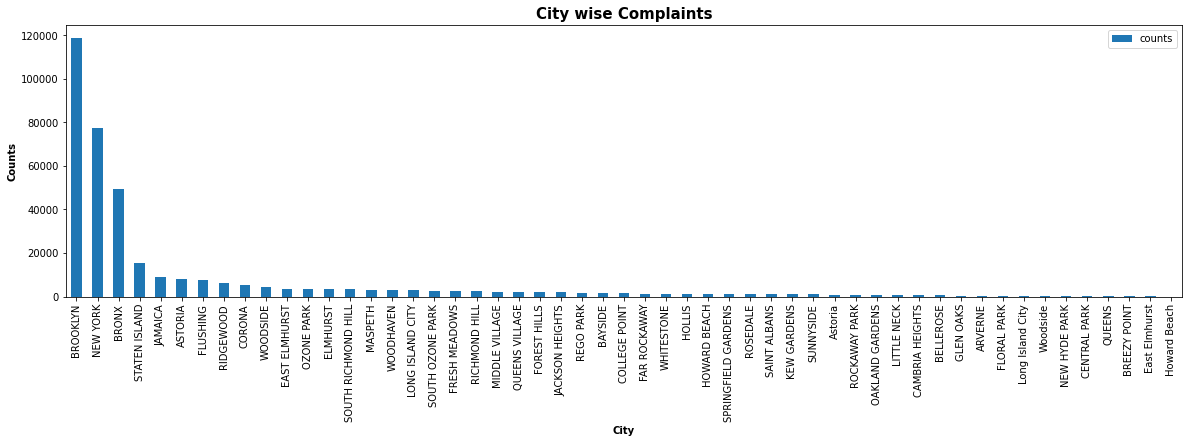

In [17]:
data_city.plot(x='City',y='counts',kind='bar',figsize=(20,5))
plt.title('City wise Complaints',fontsize=15,weight='bold')
plt.xlabel('City',weight='bold')
plt.ylabel('Counts',weight='bold')
plt.show()

In [18]:
# 4. Draw scatter and hexbin plots for complaint concentration across Brooklyn
data['Borough'].value_counts()

BROOKLYN         118864
QUEENS           100766
MANHATTAN         77462
BRONX             49169
STATEN ISLAND     15339
Unspecified        2958
Name: Borough, dtype: int64

In [19]:
data_brooklyn = data[data['Borough'] == 'BROOKLYN']
data_brooklyn.shape

(118864, 53)

<AxesSubplot:title={'center':'Complaints concentration across Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

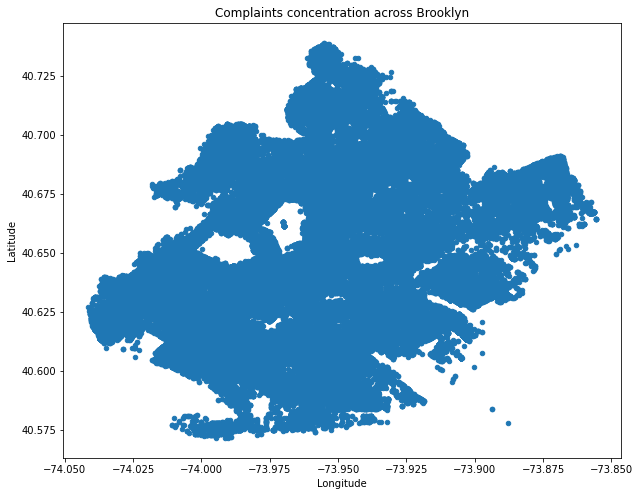

In [20]:
data_brooklyn[['Longitude', 'Latitude']].plot(kind='scatter',x='Longitude', y='Latitude', figsize=(10,8),
                                            title = 'Complaints concentration across Brooklyn')

<AxesSubplot:title={'center':'Complaints concentration across Brooklyn\n'}, xlabel='Longitude', ylabel='Latitude'>

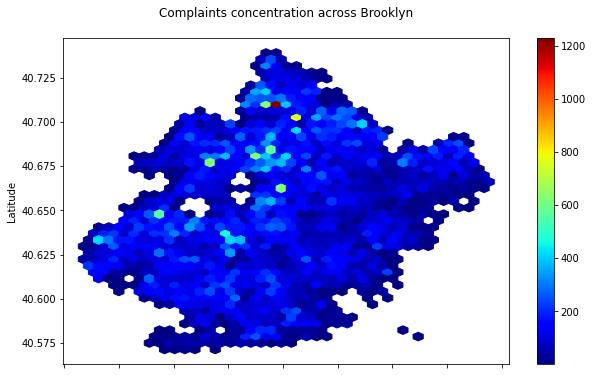

In [21]:
data_brooklyn.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40, colormap = 'jet',mincnt=1,
                 title = 'Complaints concentration across Brooklyn\n', figsize=(10,6))

# 3. Find major types of complaints:

    1. Plot a bar graph of count vs. complaint types

    2. Find the top 10 types of complaints

    3. Display the types of complaints in each city in a separate dataset

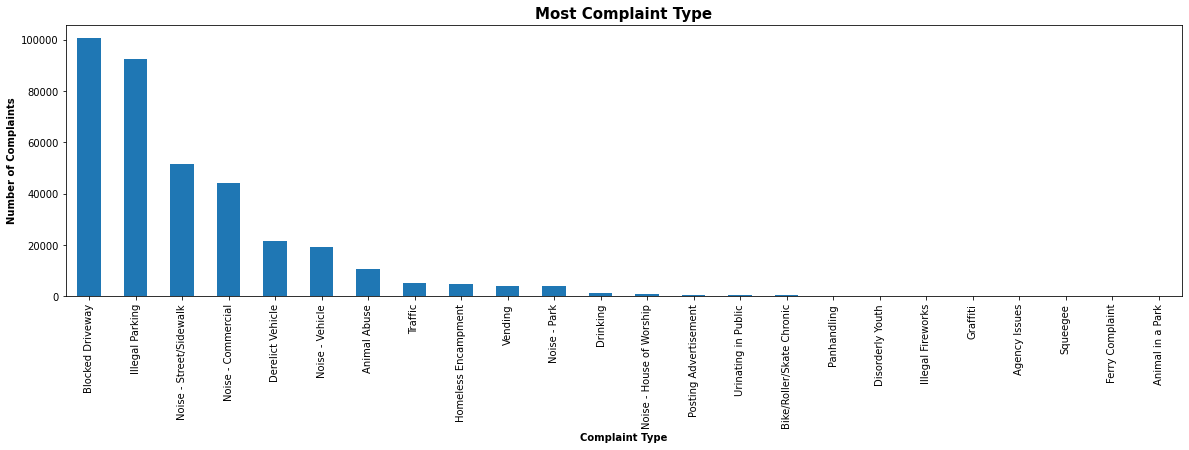

In [22]:
# 1. Plot a bar graph of count vs. complaint types
data_complaint = data['Complaint Type'].value_counts().plot(kind='bar',figsize=(20,5))
plt.xlabel('Complaint Type',weight='bold',fontsize=10)
plt.ylabel('Number of Complaints',weight='bold',fontsize=10)
plt.title('Most Complaint Type',weight='bold',fontsize=15)
plt.show()

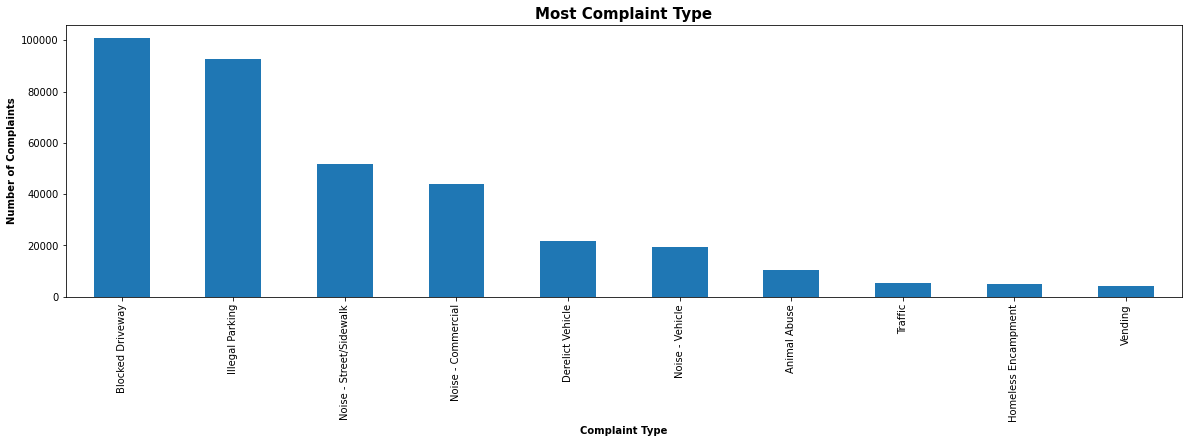

In [23]:
# 2. Find the top 10 types of complaints
data_complaint = data['Complaint Type'].value_counts().head(10).plot(kind='bar',figsize=(20,5))
plt.xlabel('Complaint Type',weight='bold',fontsize=10)
plt.ylabel('Number of Complaints',weight='bold',fontsize=10)
plt.title('Most Complaint Type',weight='bold',fontsize=15)
plt.show()

In [24]:
# 3. Display the types of complaints in each city in a separate dataset
city_complaint = data.groupby(['Complaint Type','City'],as_index=False)['City'].size()
city_complaint.rename(columns={'size':'Counts'})

,Complaint Type,City,Counts
0,Animal Abuse,ARVERNE,46
1,Animal Abuse,ASTORIA,170
2,Animal Abuse,BAYSIDE,53
3,Animal Abuse,BELLEROSE,15
4,Animal Abuse,BREEZY POINT,2
...,...,...,...
772,Vending,STATEN ISLAND,25
773,Vending,SUNNYSIDE,15
774,Vending,WHITESTONE,1
775,Vending,WOODHAVEN,6


# 4. Visualize the major types of complaints in each city

In [25]:
complaint_city = data.groupby(['City','Complaint Type'],as_index=False)['Complaint Type'].size()
complaint_city.rename(columns={'size':'Counts'})

,City,Complaint Type,Counts
0,ARVERNE,Animal Abuse,46
1,ARVERNE,Blocked Driveway,50
2,ARVERNE,Derelict Vehicle,32
3,ARVERNE,Disorderly Youth,2
4,ARVERNE,Drinking,1
...,...,...,...
772,Woodside,Blocked Driveway,27
773,Woodside,Derelict Vehicle,8
774,Woodside,Illegal Parking,124
775,Woodside,Noise - Commercial,2


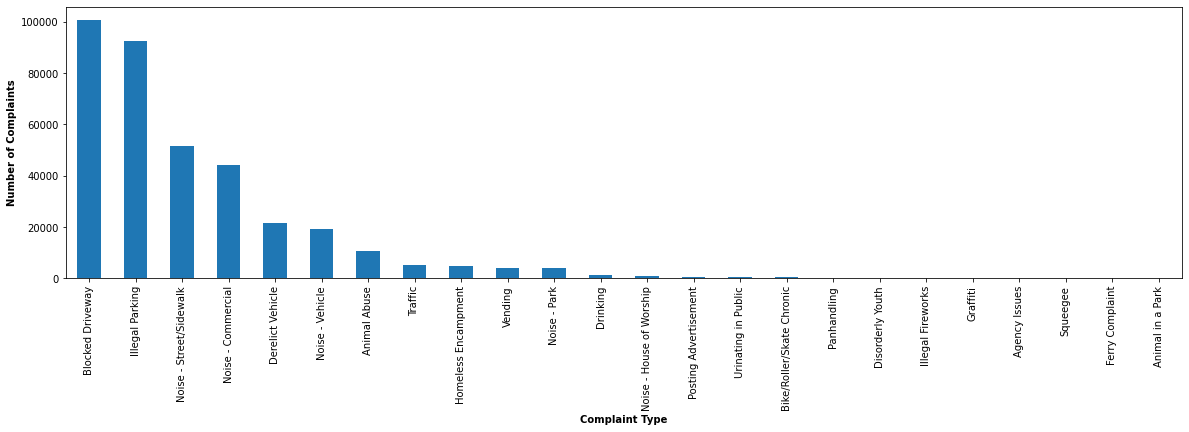

In [26]:
data['Complaint Type'].value_counts().plot(kind='bar',figsize=(20,5))
plt.xlabel('Complaint Type',weight='bold',fontsize=10)
plt.ylabel('Number of Complaints',weight='bold',fontsize=10)
plt.show()

# 5. Check if the average response time across various types of complaints

In [27]:
data_date['Request_Response_Time'] = data['Closed Date'] - data['Created Date']
data_date['Request_Response_Time'].head()

0   0 days 00:55:30
1   0 days 01:27:13
2   0 days 04:51:34
3   0 days 07:45:27
4   0 days 03:27:44
Name: Request_Response_Time, dtype: timedelta64[ns]

In [28]:
data_date['Request_Response_Time'].describe()

count                       362177
mean     0 days 04:11:53.299632500
std      0 days 05:51:42.547519569
min                0 days 00:01:01
25%                0 days 01:15:33
50%                0 days 02:40:16
75%                0 days 05:14:38
max               24 days 16:52:22
Name: Request_Response_Time, dtype: object

- 04 hrs 11 min 53 sec average response time across various types of complaints

# 6. Identify significant variables by performing a statistical analysis using p-values and chi-square values

In [29]:
from scipy import stats

In [30]:
# help(stats.chi2_contingency)

In [31]:
data_cross = pd.crosstab(data['Complaint Type'],data['City'])

In [32]:
coff,pval,dof,expec=stats.chi2_contingency(data_cross)
print("chisquare",coff)
print("Pvalue",pval)
print("DOF",dof)
print("Expected",expec)

chisquare 141373.60935271924
Pvalue 0.0
DOF 1092
Expected [[7.54232619e+00 2.32705516e+02 2.63835812e+01 ... 9.03623095e+01
  1.26879982e+02 4.83407779e+00]
 [7.16338322e-04 2.21013881e-02 2.50580123e-03 ... 8.58223094e-03
  1.20505254e-02 4.59120314e-04]
 [3.38828026e-01 1.04539566e+01 1.18524398e+00 ... 4.05939523e+00
  5.69989850e+00 2.17163909e-01]
 ...
 [3.72137758e+00 1.14816711e+02 1.30176374e+01 ... 4.45846897e+01
  6.26024792e+01 2.38513003e+00]
 [4.59172864e-01 1.41669898e+01 1.60621859e+00 ... 5.50121003e+00
  7.72438676e+00 2.94296122e-01]
 [2.99787588e+00 9.24943094e+01 1.04867782e+01 ... 3.59166365e+01
  5.04314486e+01 1.92141852e+00]]


In [33]:
if pval<0.05:
    print("Alter Hypo----->relation exist")
else:
    print("Null Hypo---->No relation")

Alter Hypo----->relation exist
